In [13]:
cd ../jecs

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs


In [14]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import torch
import os
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import numpy as np
import importlib
import dataset

In [15]:
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")


Computation device: cpu



In [13]:
import torch

# Flush the PyTorch cache
torch.cuda.empty_cache()

total 24
drwx------@   5 barakmargalit  staff    160 Sep 19  2023 Applications/
drwx------@  56 barakmargalit  staff   1792 Mar  5 16:56 Desktop/
drwx------@   6 barakmargalit  staff    192 Feb 27 20:15 Documents/
drwx------@ 996 barakmargalit  staff  31872 Mar 17 10:55 Downloads/
lrwx------    1 barakmargalit  staff     73 Mar 17 06:59 Google Drive@ -> /Users/barakmargalit/Library/CloudStorage/GoogleDrive-barak2016@gmail.com
drwx------@  99 barakmargalit  staff   3168 Nov 22 16:40 Library/
drwx------    4 barakmargalit  staff    128 Apr 16  2023 Movies/
drwx------+   4 barakmargalit  staff    128 Aug  7  2023 Music/
drwx------+   5 barakmargalit  staff    160 Aug  6  2023 Pictures/
drwxr-xr-x+   4 barakmargalit  staff    128 Apr 16  2023 Public/
drwxr-xr-x@   6 barakmargalit  staff    192 Nov 12 17:41 PycharmProjects/
-rw-r--r--@   1 barakmargalit  staff    651 Sep 24 09:36 dump.rdb
drwxr-xr-x@ 373 barakmargalit  staff  11936 Jul 15  2024 node_modules/
-rw-r--r--@   1 barakmargalit  s

In [4]:
directory_path = '/Users/barakmargalit/Downloads/qcd'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
#filter ds_store file
file_paths = [file for file in file_paths if 'DS_Store' not in file]
file_paths

['/Users/barakmargalit/Downloads/qcd/QCD_Pt-30to50_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-800to1000_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-15to30_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-1000to1400_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-1800_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-120to170_TuneZ2_7TeV_pythia6_merged (1).root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-1400to1800_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-50to80_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-80to120_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-300to470_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/barakmargalit/Downloads/qcd/QCD_Pt-6

In [5]:
fp = file_paths
# Initialize empty NumPy arrays
pts2 = np.empty((0,), dtype=np.float32)
etas2 = np.empty((0,), dtype=np.float32)
area2 = np.empty((0,), dtype=np.float32)
npvs2 = np.empty((0,), dtype=np.int32)
gen_pts2 = np.empty((0,), dtype=np.float32)
jecs2 = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts2, current_etas2, current_area2, current_npvs2, current_jecs2 in load_root_files(fp):
    pts2 = np.concatenate((pts2, np.array(current_pts2, dtype=np.float32)))
    etas2 = np.concatenate((etas2, np.array(current_etas2, dtype=np.float32)))
    area2 = np.concatenate((area2, np.array(current_area2, dtype=np.float32)))
    npvs2 = np.concatenate((npvs2, np.array(current_npvs2, dtype=np.int32)))
    jecs2 = np.concatenate((jecs2, np.array(current_jecs2, dtype=np.float32)))

# Now pts2, etas2, etc., are NumPy arrays with reduced memory overhead.



In [32]:
# initial mask with true values
current_mask = np.zeros(len(pts2), dtype=bool)
current_mask==0

array([ True,  True,  True, ...,  True,  True,  True])

In [6]:

bins = [(0,20,0.5),(20,30,0.15),(30,40,0.1),(40,75,0.4),(75,100,0.8),(100,150,0.6),(150,200,0.9)]
# initial mask with true values
current_mask = np.zeros(len(pts2), dtype=bool) == 0
for a,b,r in bins:
    mask = (pts2 >= a) & (pts2 < b)
    current_mask = current_mask & (mask==0)
    print(f"Number of jets with pT in the range [{a},{b}) GeV: {r*np.sum(mask)/1000000}M")
    # just sample r percent of the true values of the mask
    mask = mask & (np.random.rand(len(mask)) < r)  
    current_mask = current_mask | mask  
    print(f"Number of jets with pT in the range [{a},{b}) GeV after sampling: {np.sum(mask)/1000000}")

# apply the mask


current_mask = current_mask & (np.random.rand(len(current_mask)) < 0.05) 
pts2_masked = pts2[current_mask]
etas2_masked = etas2[current_mask]
area2_masked = area2[current_mask]
npvs2_masked = npvs2[current_mask]
jecs2_masked = jecs2[current_mask]


Number of jets with pT in the range [0,20) GeV: 2.101915M
Number of jets with pT in the range [0,20) GeV after sampling: 2.101306
Number of jets with pT in the range [20,30) GeV: 4.2462366M
Number of jets with pT in the range [20,30) GeV after sampling: 4.245774
Number of jets with pT in the range [30,40) GeV: 2.1641512M
Number of jets with pT in the range [30,40) GeV after sampling: 2.16226
Number of jets with pT in the range [40,75) GeV: 13.9978852M
Number of jets with pT in the range [40,75) GeV after sampling: 13.996373
Number of jets with pT in the range [75,100) GeV: 10.6763464M
Number of jets with pT in the range [75,100) GeV after sampling: 10.675368
Number of jets with pT in the range [100,150) GeV: 10.255905M
Number of jets with pT in the range [100,150) GeV after sampling: 10.257254
Number of jets with pT in the range [150,200) GeV: 9.1756773M
Number of jets with pT in the range [150,200) GeV after sampling: 9.176234


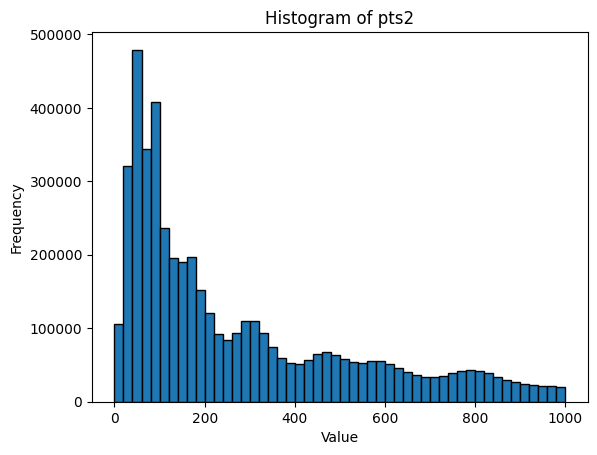

In [7]:
import matplotlib.pyplot as plt


# Create the histogram
plt.hist(pts2_masked, bins=50, range=(0, 1000), edgecolor='black')

# Add titles and labels
plt.title('Histogram of pts2')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
len(pts2_masked)

5193722

In [9]:
importlib.reload(dataset)
from dataset import JetEnergyCorrectionDataset
jec_dataset = JetEnergyCorrectionDataset(pts2_masked, etas2_masked, area2_masked, npvs2_masked, jecs2_masked)

Epoch 1/50, Train Loss: 0.214974240, Validation Loss: 0.201306189

Best validation loss: 0.2013061891832852

Saving best model for epoch: 1

Epoch 2/50, Train Loss: 0.185557823, Validation Loss: 0.194099992

Best validation loss: 0.19409999196714325

Saving best model for epoch: 2

Epoch 3/50, Train Loss: 0.181434299, Validation Loss: 0.177641241

Best validation loss: 0.177641240840559

Saving best model for epoch: 3

Epoch 4/50, Train Loss: 0.178326133, Validation Loss: 0.180525782
Epoch 5/50, Train Loss: 0.176830188, Validation Loss: 0.176002932

Best validation loss: 0.17600293239097303

Saving best model for epoch: 5

Epoch 6/50, Train Loss: 0.175860405, Validation Loss: 0.176156218
Epoch 7/50, Train Loss: 0.174314041, Validation Loss: 0.175072936

Best validation loss: 0.17507293578023045

Saving best model for epoch: 7

Epoch 8/50, Train Loss: 0.173506916, Validation Loss: 0.183643789
Epoch 9/50, Train Loss: 0.173195496, Validation Loss: 0.177328361
Epoch 10/50, Train Loss: 0.17

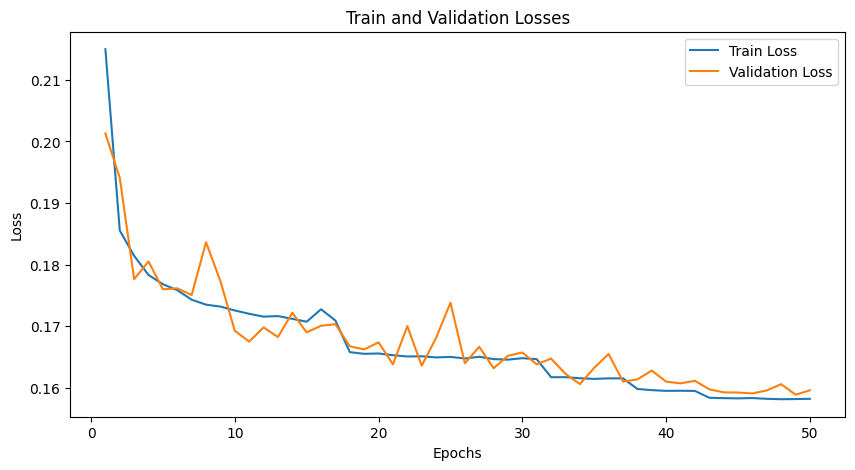

In [10]:
import train_copy as train
from j_model import ShallowMLP


j_model = ShallowMLP()
j_model.to(device)

train.train(j_model, jec_dataset,num_epochs=50)

Epoch 1/40, Train Loss: 0.168733753, Validation Loss: 0.170825189

Best validation loss: 0.17082518924428036

Saving best model for epoch: 1

Epoch 2/40, Train Loss: 0.169390492, Validation Loss: 0.169573696

Best validation loss: 0.1695736958786796

Saving best model for epoch: 2

Epoch 00003: reducing learning rate of group 0 to 6.0000e-03.
Epoch 3/40, Train Loss: 0.168932926, Validation Loss: 0.166498764

Best validation loss: 0.1664987635131306

Saving best model for epoch: 3

Epoch 4/40, Train Loss: 0.164229024, Validation Loss: 0.165849392

Best validation loss: 0.16584939240547575

Saving best model for epoch: 4

Epoch 5/40, Train Loss: 0.164145581, Validation Loss: 0.176324926
Epoch 6/40, Train Loss: 0.163983349, Validation Loss: 0.163860499

Best validation loss: 0.1638604988867788

Saving best model for epoch: 6

Epoch 7/40, Train Loss: 0.163835168, Validation Loss: 0.168728616
Epoch 8/40, Train Loss: 0.163943640, Validation Loss: 0.169778121
Epoch 9/40, Train Loss: 0.1638151

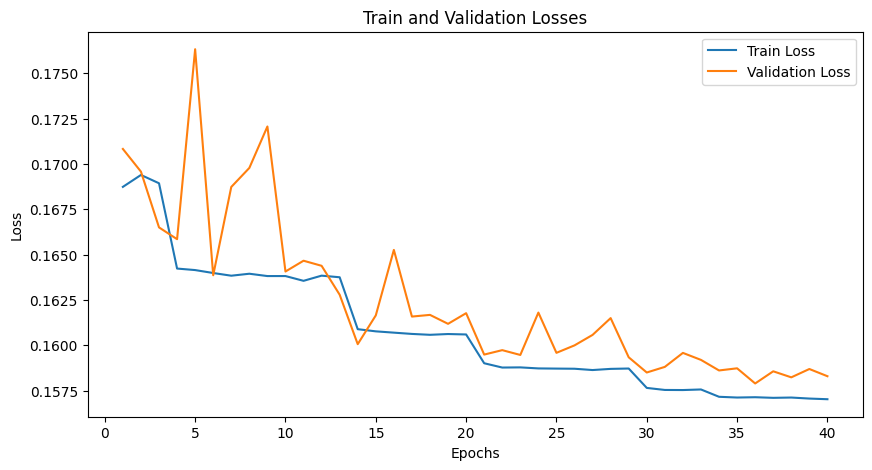

In [12]:
train.train(j_model, jec_dataset,num_epochs=40)

Test MSE: 0.15790657699108124


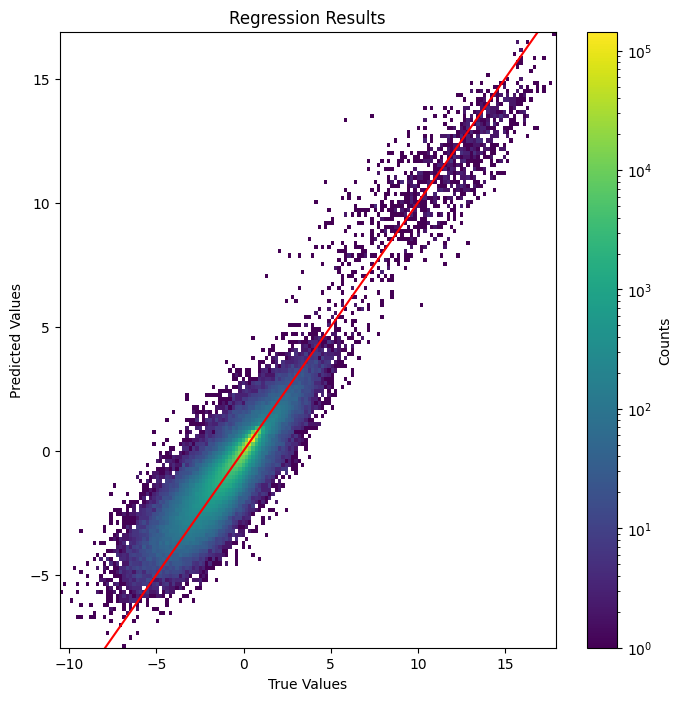

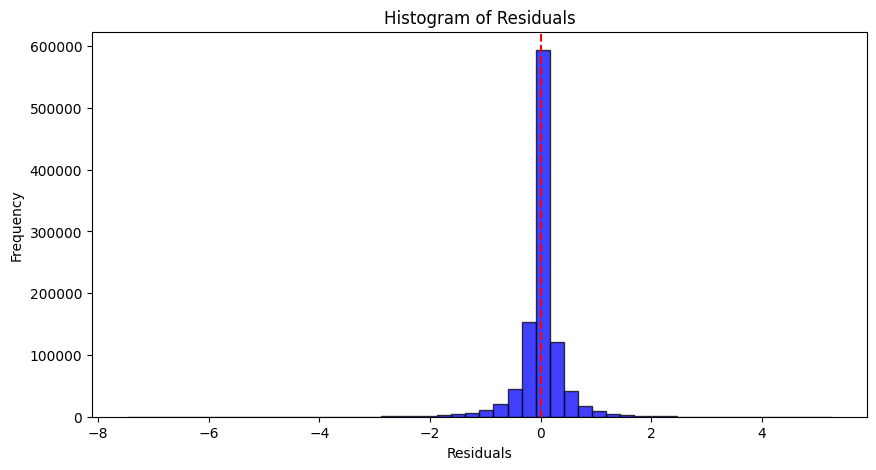

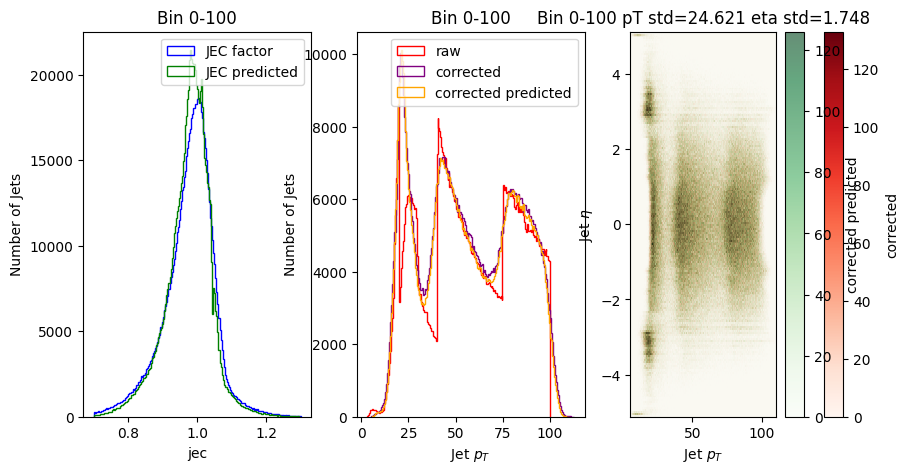

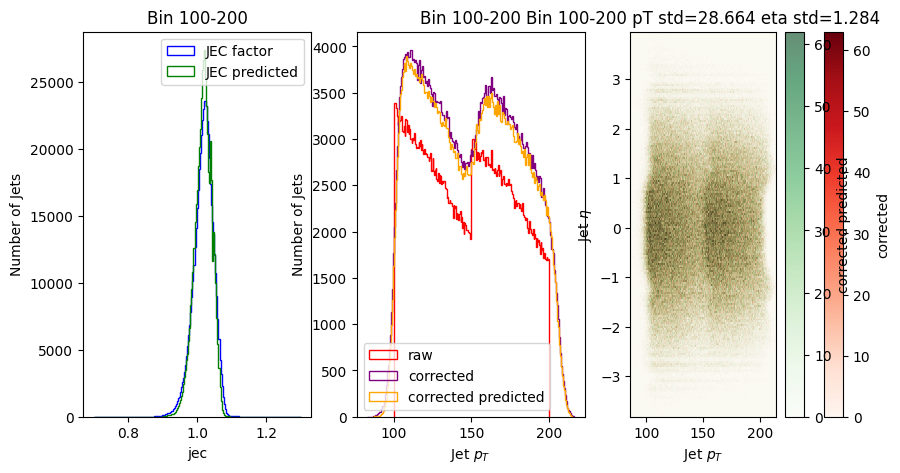

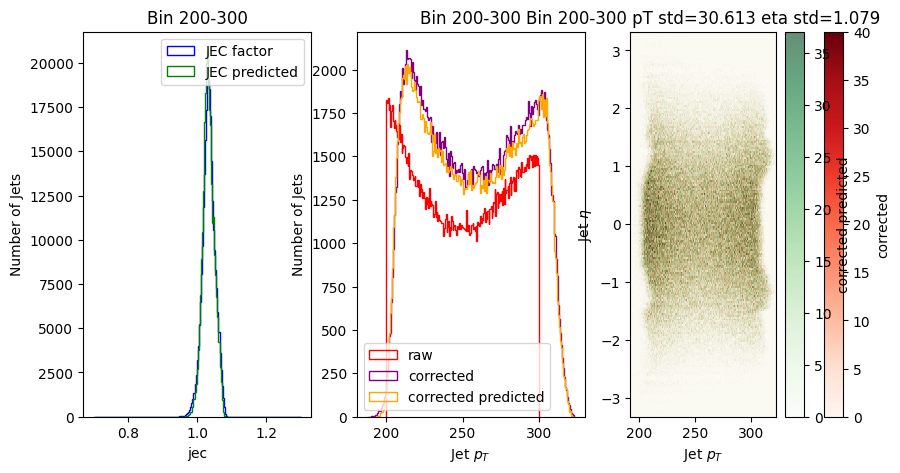

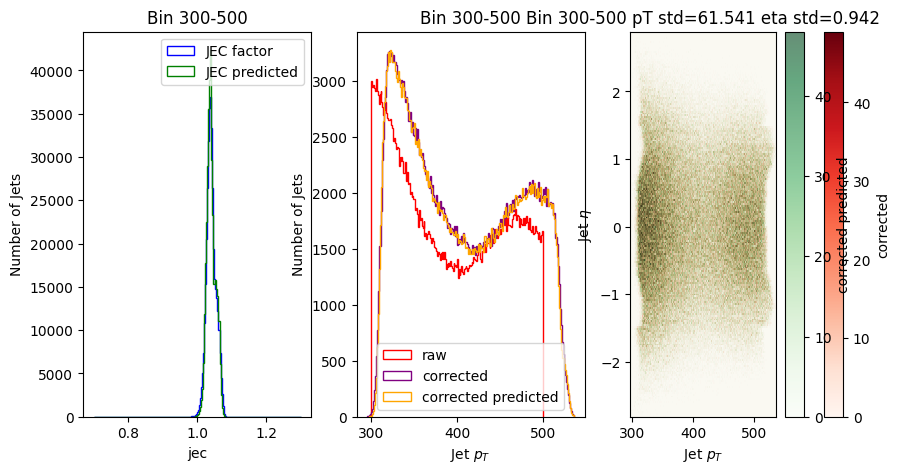

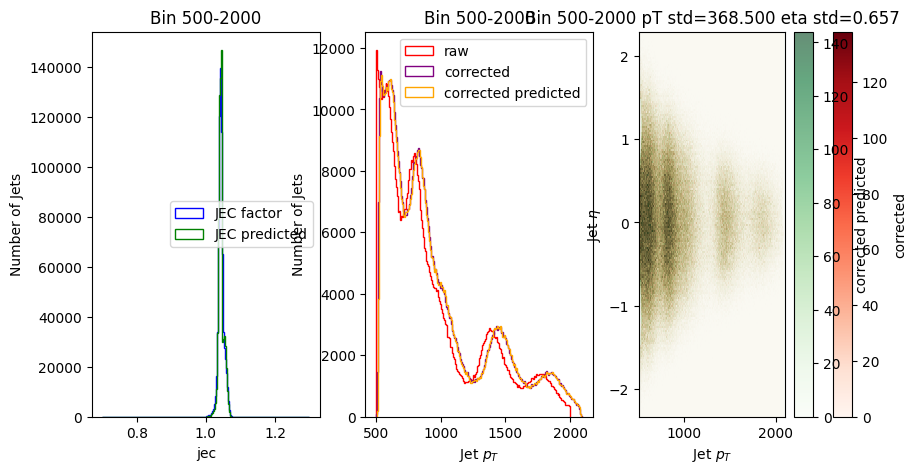

In [14]:
import importlib
import eval
importlib.reload(eval)
eval.run(jec_dataset)

In [ ]:
# This is the code for the evaluation of the model QCD files 0.1 precent of the data

In [ ]:
# This is the code for the evaluation of the model QCD files 0.1 precent of the data
not_mask = current_mask==0
not_mask= not_mask & (np.random.rand(len(not_mask)) < 0.1) 
pts_test = pts2[not_mask]
etas_test = etas2[not_mask]
area_test = area2[not_mask]
npvs_test = npvs2[not_mask]
jecs_test = jecs2[not_mask]

In [8]:
x=np.transpose(np.array([pts_test,etas_test,area_test,npvs_test]))
y=np.array(jecs_test)

In [16]:
from dataset import save_scaler, load_scaler
save_scaler(jec_dataset.scaler_x, jec_dataset.scaler_y)

Test MSE: 0.36493661999702454


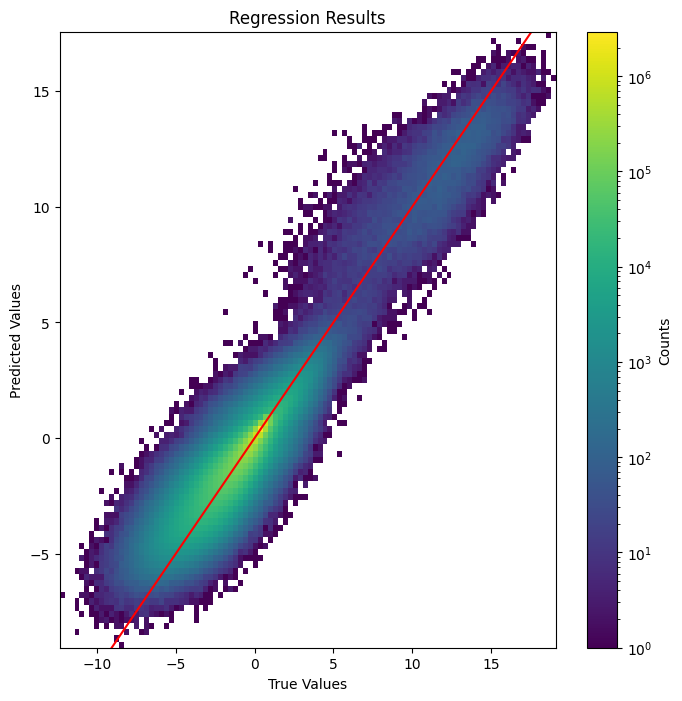

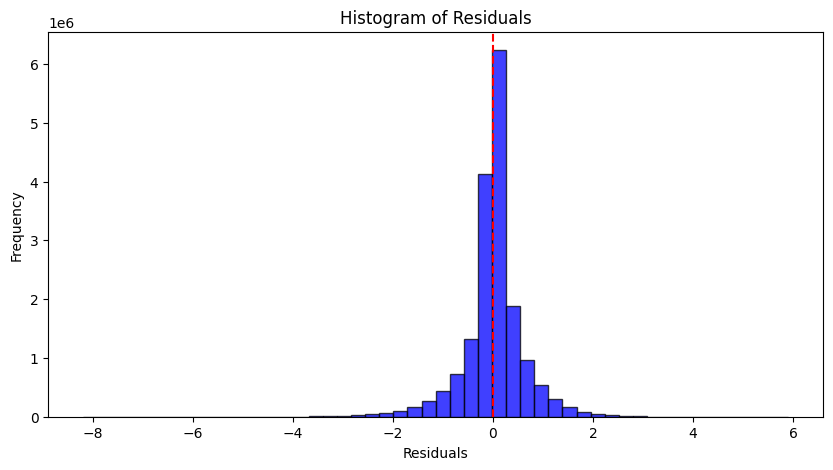

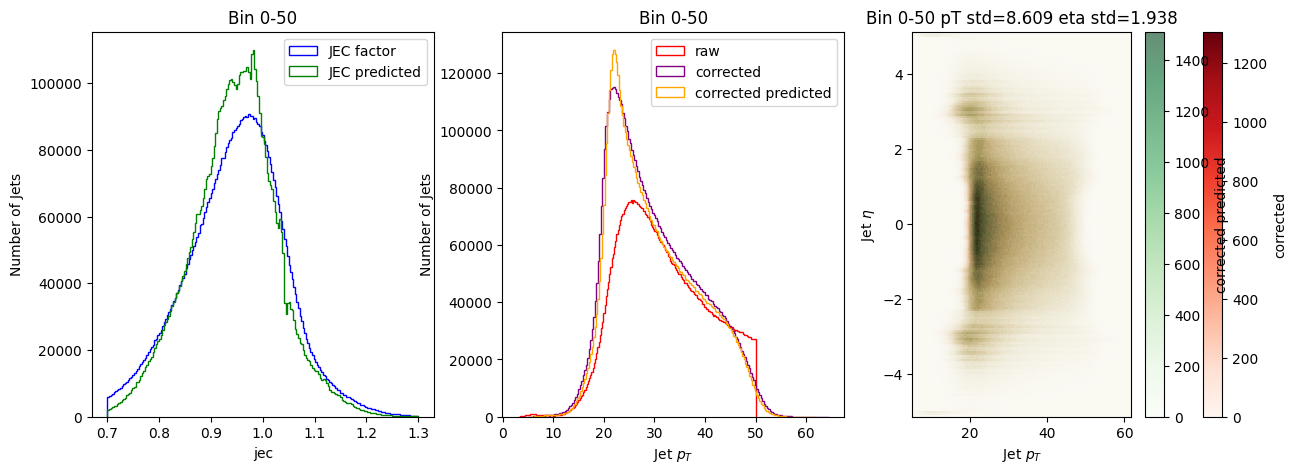

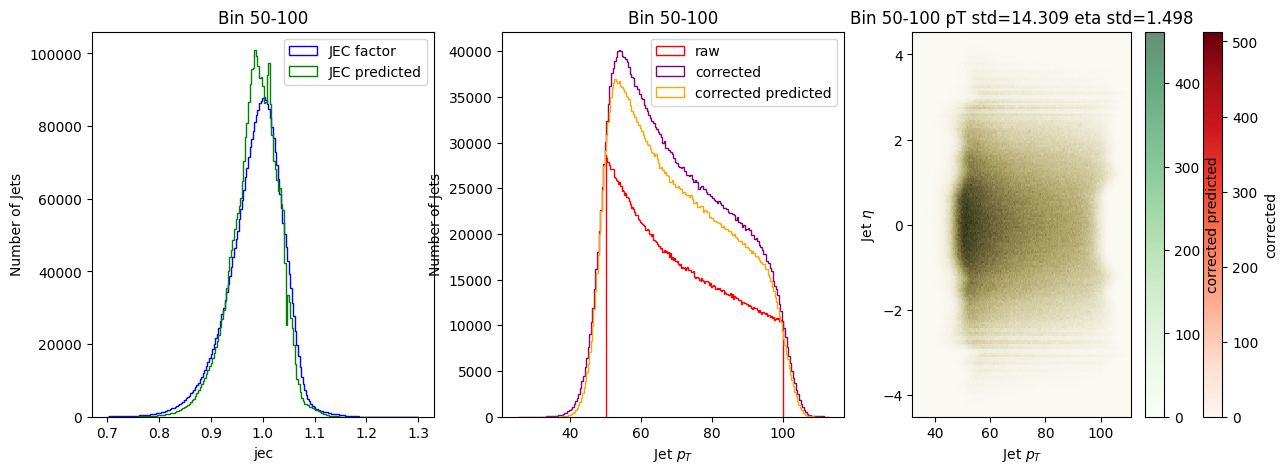

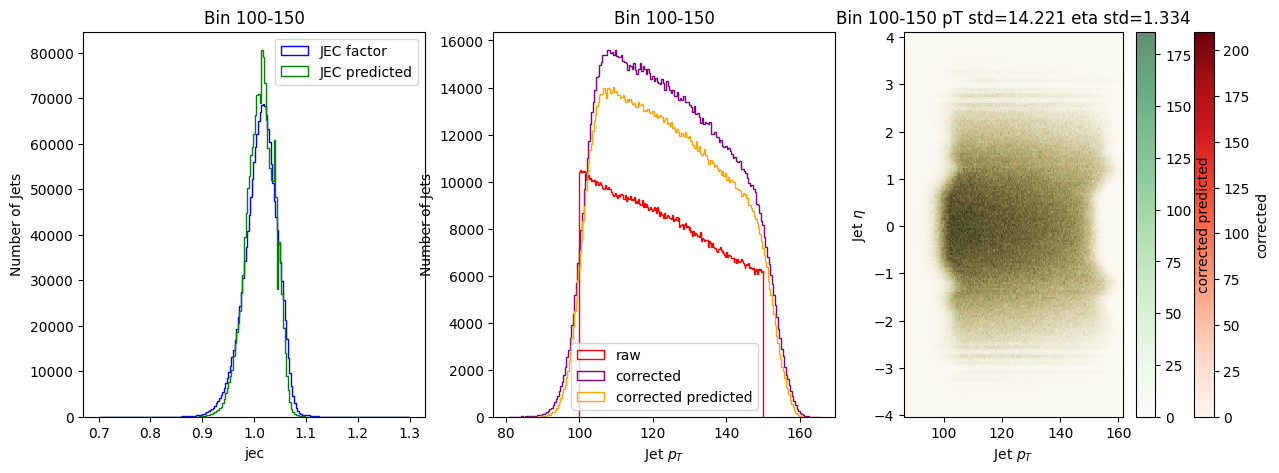

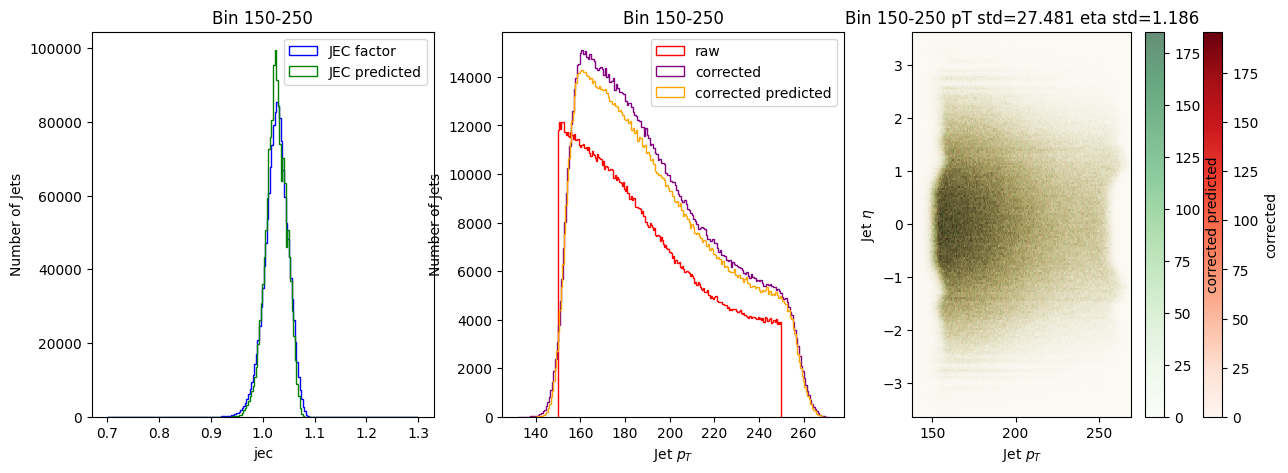

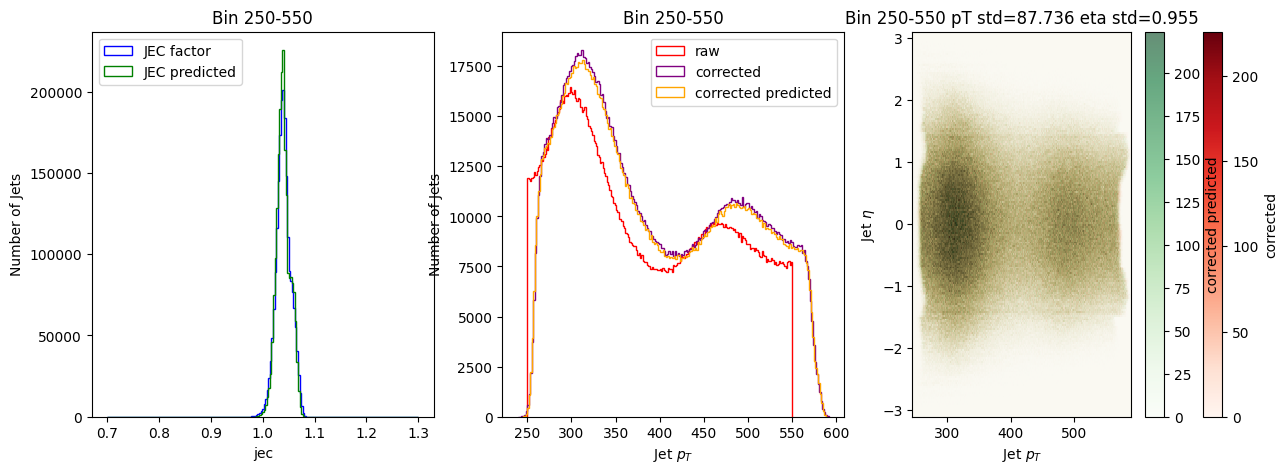

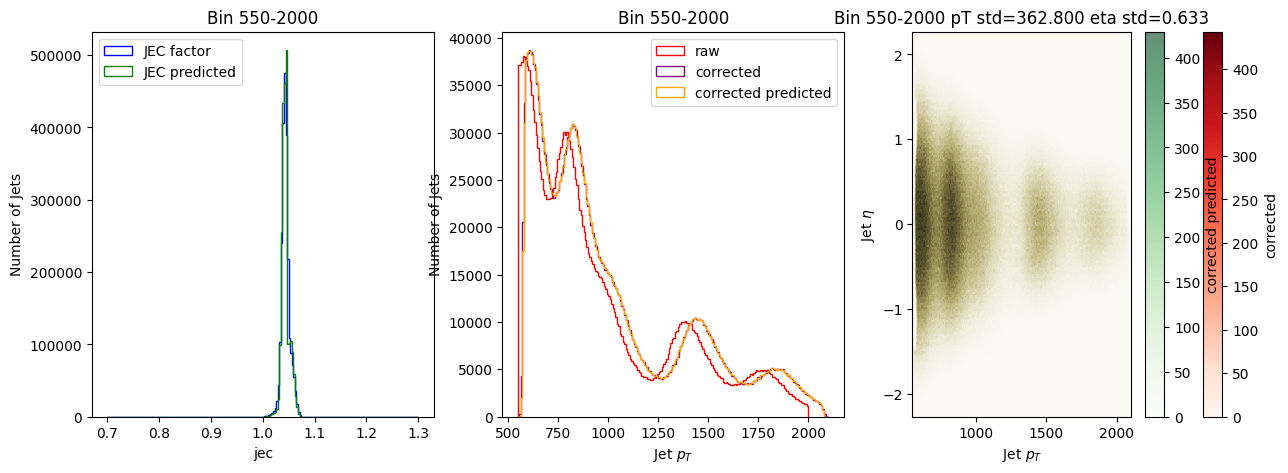

In [ ]:
# This is the code for the evaluation of the model QCD files 0.1 precent of the data
importlib.reload(dataset)
import eval_multiple_src as eval

importlib.reload(eval)
eval.run(x,y)

In [16]:
# This is the code for the evaluation of the model to see how it performs on the gluon data and
fp = ['/Users/barakmargalit/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root','/Users/barakmargalit//Downloads/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root']
# Initialize empty NumPy arrays
pts_test = np.empty((0,), dtype=np.float32)
etas_test = np.empty((0,), dtype=np.float32)
area_test = np.empty((0,), dtype=np.float32)
npvs_test = np.empty((0,), dtype=np.int32)
jecs_test = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts_test, current_etas_test, current_area_test, current_npvs_test, current_jecs_test in load_root_files(fp):
    pts_test = np.concatenate((pts_test, np.array(current_pts_test, dtype=np.float32)))
    etas_test = np.concatenate((etas_test, np.array(current_etas_test, dtype=np.float32)))
    area_test = np.concatenate((area_test, np.array(current_area_test, dtype=np.float32)))
    npvs_test = np.concatenate((npvs_test, np.array(current_npvs_test, dtype=np.int32)))
    jecs_test = np.concatenate((jecs_test, np.array(current_jecs_test, dtype=np.float32)))

Test MSE: 0.4419119954109192


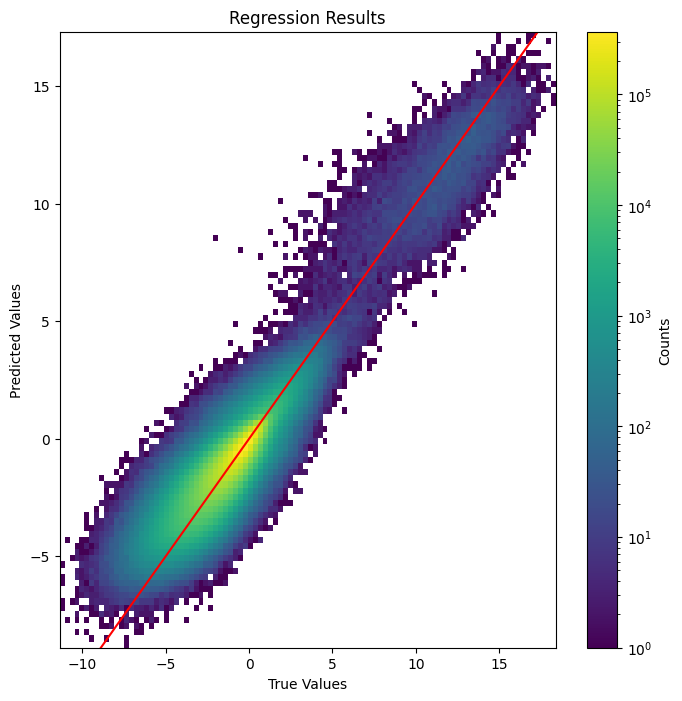

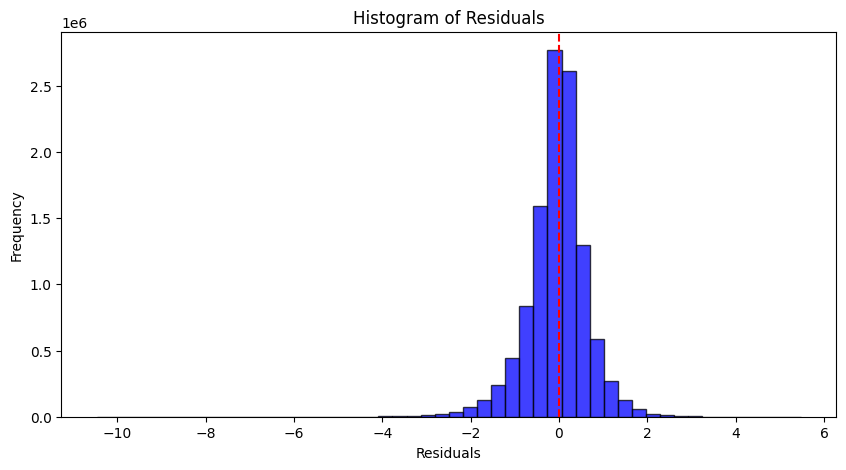

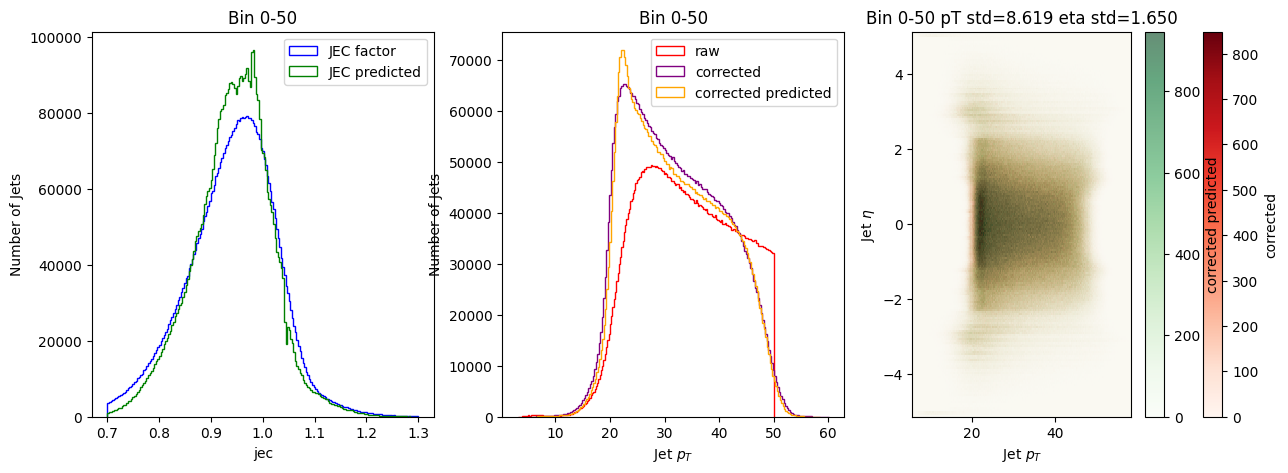

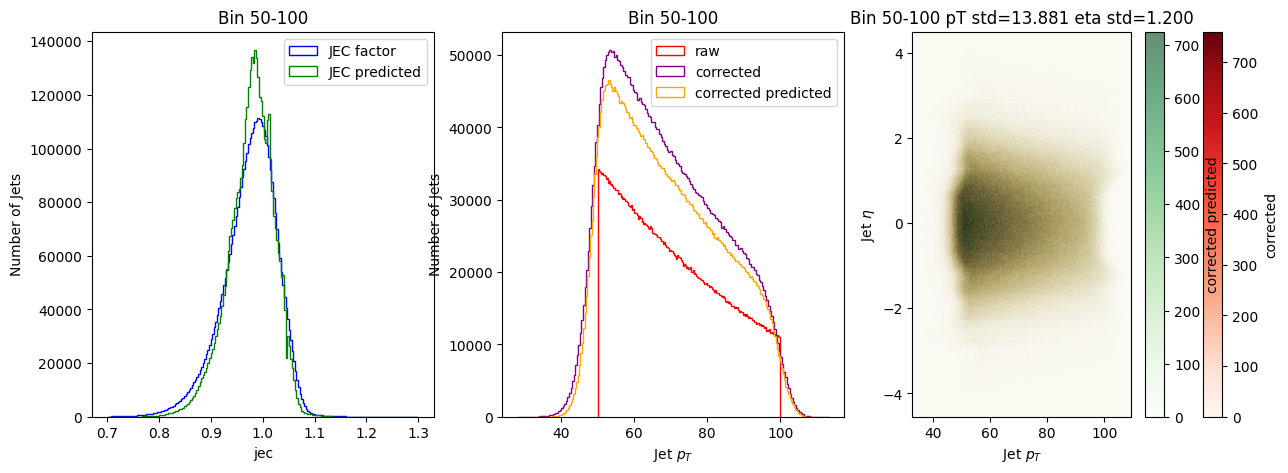

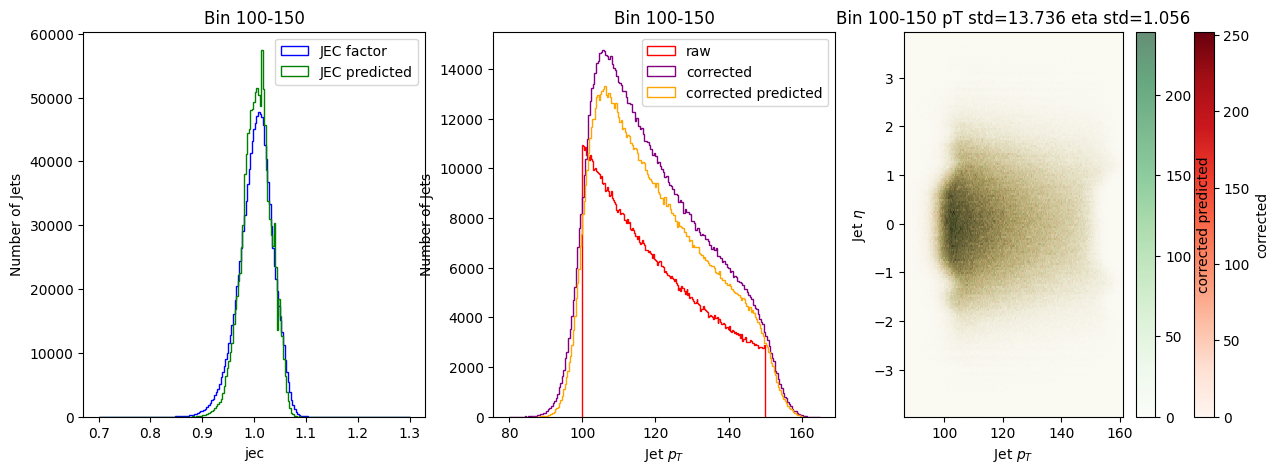

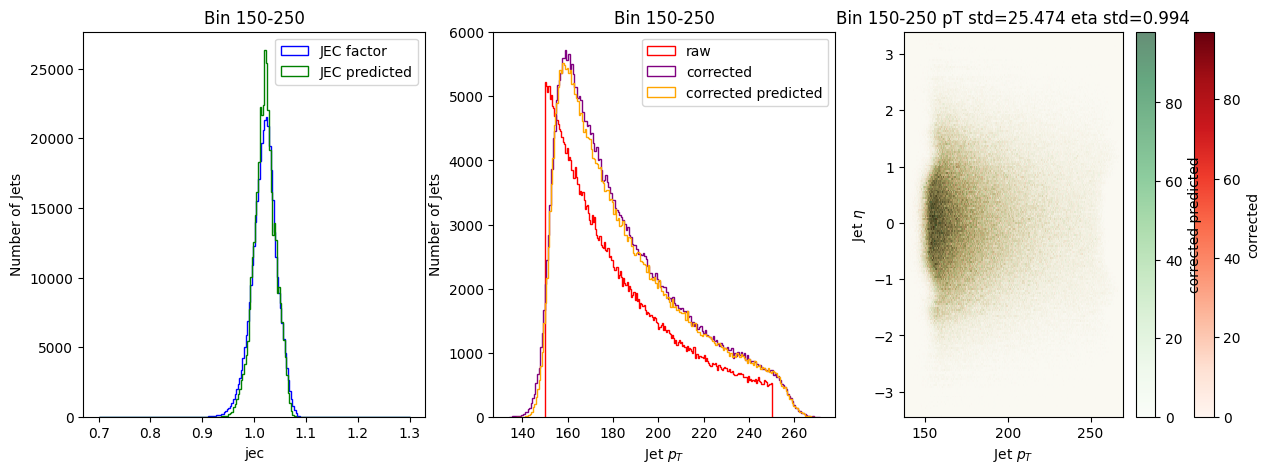

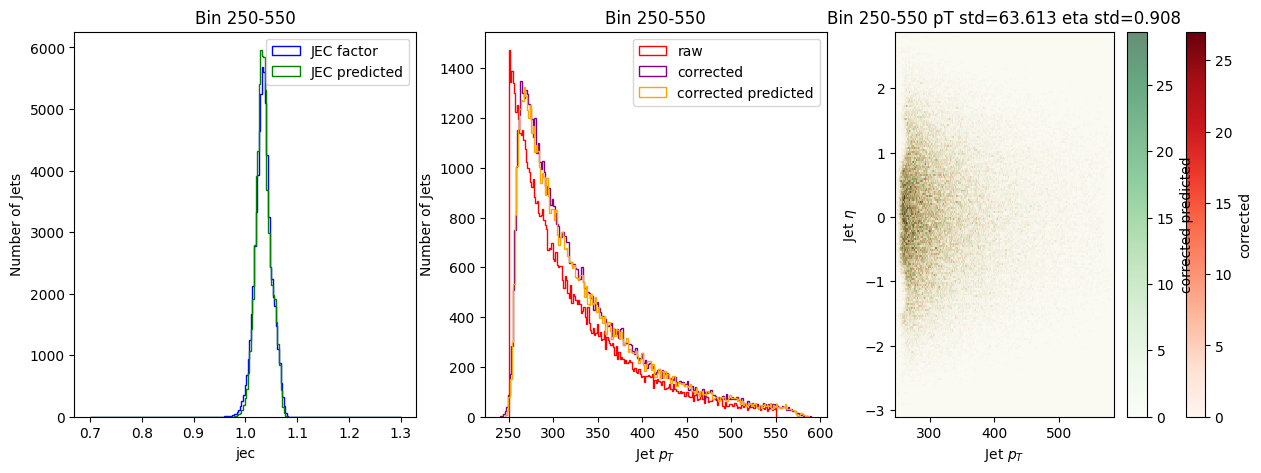

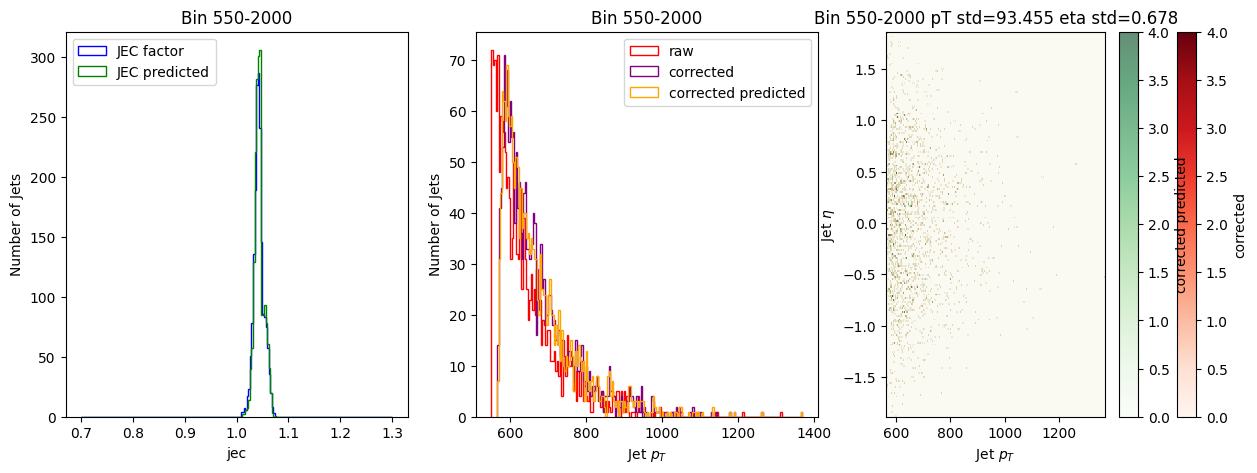

In [19]:
importlib.reload(dataset)
import eval_multiple_src as eval
from eval_multiple_src import load_model
from j_model import ShallowMLP
importlib.reload(eval)

dirname= os.path.dirname(os.path.dirname(eval.__file__))
filename = os.path.join(dirname,'models', 'best_model_jecs_qcd_files_even.pt')

model= load_model(filename, model_class=lambda: ShallowMLP())
model.to('cpu')
model.eval()
x=np.transpose(np.array([pts_test,etas_test,area_test,npvs_test]))
y=np.array(jecs_test)



importlib.reload(eval)
eval.run(x,y, model)